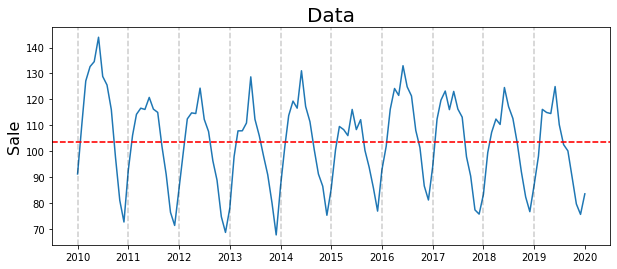

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time
#Define parser function for date
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')
#Reading the data
df = pd.read_csv('./Data-CSVfiles/ice_cream.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))
#Start date and end date
start_date = datetime(2010,1,1)
end_date = datetime(2020,1,1)
df = df[start_date:end_date]
#Plot of data
plt.figure(figsize=(10,4))
plt.plot(df)
plt.title('Data', fontsize=20)
plt.ylabel('Sale', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    plt.axhline(df.mean(), color='r', alpha=0.2, linestyle='--')

C:\Users\mojib\OneDrive\Desktop\Time-series-DataAnalysis\Moji_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


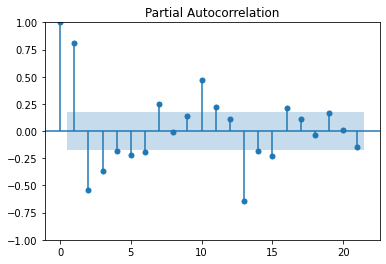

In [20]:
pacf= plot_pacf(df)

In [21]:
#slpitting data for training and testing
train_end = datetime(2018,12,1)
test_end = datetime(2020,1,1)
train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]
#define model
model = ARMA(train_data, order=(13,0))
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [22]:
print(model_fit.summary())

NameError: name 'model_fit' is not defined

In [23]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
#Prediction data
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions
#plot of residual
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

NameError: name 'model_fit' is not defined

NameError: name 'predictions' is not defined

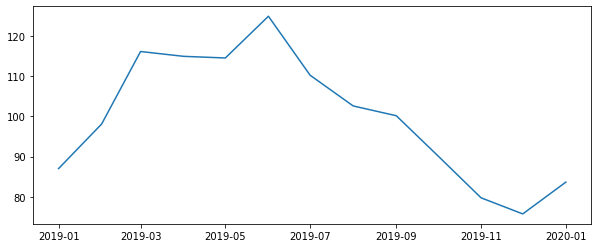

In [24]:
#Plot of prediction
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Data', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [25]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

NameError: name 'residuals' is not defined